# Matrices
Module 0 | Chapter 2 | Notebook 5

***
We have already achieved a lot with vectors. Now we will add matrices to our toolbox. When you work with data, you almost always use matrices as a data structure. In addition to their function as data storage, matrices have another function: transforming vectors. Some methods that we will get to know in this course are based on this function. So we will lay the groundwork for using matrices here. By the end of this exercise, you will know about:
* matrix multiplication between matrices and vectors
* the concept of linear equations
* *broadcasting* arrays
***


## Storing data in matrices: The row picture and linear equations


You have already used matrices very often in this course so far, perhaps even without being aware of it. Whenever you import data into a `DataFrame`, you create a matrix. Because a matrix is just numbers arranged in 2 dimensions, e.g. in a table with rows and columns. Data arranged in one dimension is a vector.

![Data in different dimensions](00-02-04-pic1.png)


We have always arranged our data in the matrix like this: The rows are the data points and the columns are the properties of the data points. Let's look at this in practice with a small scenario.


**Scenario:** Your company uses cloud computing to analyze data. This means that the calculations are therefore outsourced to computers that a service provider rents out by the hour. The analysts log in, select a computer configuration and program their analyses. When their programs are finished, they log out again. We know how long each developer is logged in to each computer configuration. We also know the hourly prices for each configuration. We are now interested in calculating costs incurred by each analyst in the last month.


Let's get started by importing the data so we can start answering the question. They are located in the files *cloud_computing_log.csv* and *cloud_computing_prices.csv*. Store them in the DataFrames `mat_log` and `vec_prices` and print them out. Run the following cell to do this.


In [2]:
import pandas as pd

mat_log = pd.read_csv('cloud_computing_log.csv', index_col=0, sep=';')
vec_prices = pd.read_csv('cloud_computing_prices.csv', index_col=0, sep=';',header=None) #first row in file is data not a header

print(mat_log)
print(vec_prices)

         configuration_1  configuration_2  configuration_3
user_id                                                   
101                    0               20                5
102                    0                0               12
113                   40                0                0
115                   30                0                2
117                    0                4                4
121                   11               12                3
                     1
0                     
configuration_1  0.087
configuration_2  0.347
configuration_3  1.221


Now we have a matrix where each row represents a user. These are our data points. The columns indicate which computer configuration was used for how many hours (rounded up). These are the features of the data points. There are only 3 configurations to choose from. A cheap machine with little computing power (`'configuration_1'`) to do small analyses, a mid-range machine (`'configuration_2'`) and a powerful device (`'configuration_3'`) for elaborate machine learning projects

The costs are indicated in EUR per hour. We can think of it as a vector because we have only one column besides the index.

We can find the costs for each user by multiplying the prices with the device use times. Then we have to add up each row. The formula for one user would look like this:

\begin{equation*}
cost = \mathrm{hours_{configuration_1}} \cdot \mathrm{price_{configuration_1}} \ +\  ... \ +\  \mathrm{hours_{configuration_3}} \cdot \mathrm{price_{configuration_3}}
\end{equation*}

Does this seem familiar? The dot product of two vectors is calculated in the same way. We can understand the multiplication of a matrix and vector in such a way that in each row of the matrix there is a vector, for which we calculate the dot product. We have already used this image of the rows of a matrix as vectors to determine the similarity of wine data. In order to calculate the costs for everything, we need to use a function that calculates the dot product of each row vector of the hours matrix with the price vector and thus creates a new cost vector.

As it turns out, the `dot()` function of `numpy` does exactly that when multiplying a matrix and vector! Use the function on `mat_log` and `vec_prices`. Store the result as `vec_cost` and print it.

Tip: Since `pandas` is based on `numpy` arrays, the function works without you having to convert anything. If you get an error, change the order of `vec_prices` and `mat_log` when you call the function.


In [10]:
import numpy as np

print(mat_log.dtypes)
print(vec_prices.dtypes)
vec_cost = np.dot( mat_log, vec_prices)
vec_cost

configuration_1    int64
configuration_2    int64
configuration_3    int64
dtype: object
1    float64
dtype: object


array([[13.045],
       [14.652],
       [ 3.48 ],
       [ 5.052],
       [ 6.272],
       [ 8.784]])

The result is a vector that contains the total cost for each user. The order was maintained, so the first value belongs to the first user in the matrix. Let's look at a visualization to see what happens. To keep it clear, we'll only use the first two rows of the matrix and the first three values of the vector:

\begin{equation}
\begin{bmatrix} \color{#3399db}{0} & \color{#3399db}{20} & \color{#3399db}{5} \newline \color{#ff9e1c}{0} & \color{#ff9e1c}{0} & \color{#ff9e1c}{12} \end{bmatrix}
\cdot
\begin{bmatrix} 0.087 \newline 0.347 \newline 1.221 \end{bmatrix} = \begin{bmatrix} \color{#3399db}{0} \cdot 0.087 + \color{#3399db}{20} \cdot 0.347 + \color{#3399db}{5} \cdot 1.221 \newline \color{#ff9e1c}{0} \cdot 0.087 + \color{#ff9e1c}{0} \cdot 0.347 + \color{#ff9e1c}{12} \cdot 1.221 \end{bmatrix} = \begin{bmatrix} \color{#3399db}{13.045} \newline \color{#ff9e1c}{14.652} \end{bmatrix}
\end{equation}


Each value of the first row was multiplied by a value of the vector in turn and added together. The same happened in the second row. Note that multiplying two vectors or a matrix and a vector always works with `np.dot()`.


To understand the row picture it can be helpful to have a look at a descriptive example again. Imagine we have two equations with two unknowns

\begin{equation}
\begin{aligned}
2x -y&=0\\
-x +2y &=3
\end{aligned}
\end{equation}

You can write this equation system easily using matrices and vectors

\begin{equation}
\begin{bmatrix}
2&-1\\
-1&2
\end{bmatrix} \cdot
\begin{bmatrix}
x\\
y
\end{bmatrix} =
\begin{bmatrix}
0\\
3
\end{bmatrix}
\end{equation}

Each of the lines of the linear system of equations describes a straight line,

\begin{equation}
\begin{aligned}
y_1&= 2x\\
y_2&= \frac{x+3}{2} 
\end{aligned}
\end{equation}


To visualize that, we can use `matplotlib`. Let's start by generating our $x$ values. We can use the `np.linspace() function from `numpy`.


```python

np.linspace(start, #  starting point (lowest value)
            stop, #  stopping point (highest value)
            num, #  number of points to be generated

            )
```


In a way, this function takes the functionality of the `range()` function from an `int` datatype and applies it to a `float`. The `range()` function generates an ascending list of `int` values. The `np.linspace()` function creates an `np.ndarray` with `float` values between the `start` and `stop` values. We passed the distance between the generated values to the `range()` function. However, we passed the number of values to be generated instead of the distance between the generated values to the `np.linspace()` function. For `np.linspace()` this parameter is called `num`. The `np.linspace()` function then distributes the `num` number of values evenly between `start` and `stop`. Now use this function to get $100$ data points between $-5$ and $5$ and store them in the variable $x$. Check the data type of this variable.


In [11]:
x = np.linspace(-5,5,100)
print(type(x))

<class 'numpy.ndarray'>


Now we can create the two straight lines. Remember that when we add or multiply a `np.ndarray` by a number, the number is added or multiplied component by component with each element of the `np.ndarray`. Now create two `np.ndarray`, `y_1` and `y_2` which correspond to the $y$ values of the two straight lines.


In [12]:
y_1 = 2 * x 
y_2 = (x + 3) / 2

Now we can plot the two straight lines. With `matplotlib` you can plot two functions in the same graph by writing several plot commands one below the other. Now use `matplotlib` to create a visualization showing the two straight lines.


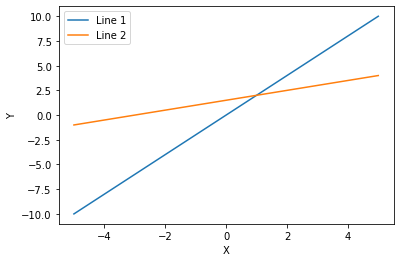

In [19]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=1)
ax.plot(x,y_1,label='Line 1')
ax.plot(x,y_2,label='Line 2')
ax.set(xlabel='X',ylabel='Y')
ax.legend()

The line image (in two dimensions) therefore consists of interpreting each row as a straight line and the solution of the system of equations consists of the intersection points of these straight lines. These considerations bring us to the question of what kind of solutions this kind of equation system produces. In two dimensions, two straight lines can have either one, zero or an infinite number of intersections. We have just seen an intersection point. But under which circumstances do we get zero or an infinite amount? In both cases, both straight lines have the same gradient, or slope, so they run parallel. To have an infinite number of intersection points, both straight lines also have the same $y$-intercept, i.e. they lie exactly on top of each other. Then every point on the two lines is an intersection. In the other case, zero intersection points, both straight lines have the same slope but different $y$ intercepts. So they run parallel, but slightly offset.


You have already seen an example for one intercept. Now look at examples for zero or infinite solutions. Let's start with an infinite amount.

\begin{equation}
\begin{bmatrix}
1&2\\
2&4
\end{bmatrix}\cdot
\begin{bmatrix}
x\\
y
\end{bmatrix} =
\begin{bmatrix}
1\\
2
\end{bmatrix}
\end{equation}

It's easy to see that both equations are based on the same linear equation,

\begin{equation}
y_{1/2}=\frac{1}{2}-\frac{x}{2}
\end{equation}

Both straight lines lie exactly on top of each other and therefore there are infinite solutions.


For the last case, let's take the same equation system with a small change

\begin{equation}
\begin{bmatrix}
1&2\\
2&4
\end{bmatrix}\cdot
\begin{bmatrix}
x\\
y
\end{bmatrix} =
\begin{bmatrix}
1\\
{\color{red}3}
\end{bmatrix}
\end{equation}

Due to the small change, the resulting straight lines are still parallel, but this time they are slightly offset from each other. We get the two line equations

\begin{equation}
\begin{aligned}
y_1&=\frac{1}{2}-\frac{x}{2}\\
y_2&=\frac{3}{4}-\frac{x}{2}
\end{aligned}
\end{equation}

To practice, let's plot all three straight lines together. Since two of these lines are on top of each other, it is helpful to work with dotted lines. The parameter `linestyle` will be useful here. You can create dotted lines with `linestyle=':'`, and dashed lines with `linestyle='--'`. You can create a line with alternating points and dashes with `linestyle='-.'`.


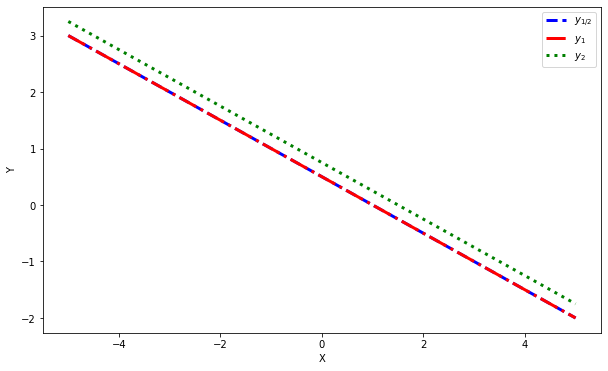

In [25]:
y_3 = 1/2 -  x/2 
y_4 = 3/4 - x/ 2 

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, figsize=[10,6])
ax.plot(x, y_3, label='$y_{1/2}$', linestyle='--', linewidth=3, color='b')
ax.plot(x, y_3, label='$y_1$', linestyle='-.', linewidth=3, color='r')
ax.plot(x, y_4, label='$y_2$', linestyle=':', linewidth=3, color='g')
ax.set(xlabel='X', ylabel='Y')
ax.legend()

Now what do the two cases, which produce zero and/or infinite solutions, have in common? In both cases the two line vectors in the coefficient matrix are directly proportional to each other: the second line vector is simply the first line vector times $2$. Both vectors point in the same direction, but have different amounts. For two unknowns, i.e. in two dimensions, this is the only way we can get zero or infinite solutions. For more than two dimensions it's still possible that none of the three vectors is proportional to one of the other vectors, but that one vector can be written as a linear combination of the other two vectors. As an illustrative example: two non-parallel vectors always span a plane. If the third vector lies in this spanned plane, then it can be written as a linear combination of the other two. 

\begin{equation}
\vec{x_1} = \alpha \vec{x_2} + \beta \vec{x_3}
\end{equation}


The can be visualized as follows:

![plane](plane.gif)

Here, one of the two vectors is kept as it is, and the length of the other is varied. This helps you understand that if you vary both lengths, you can reach any point of the plane.


**Attention:** When multiplying matrices and vectors, it's important that the matrix is on the left of the vector. The calculation rule states that the rows of the left object (matrix) are always calculated with the columns of the right object (vector). It is there also important to ensure that the number of columns in the matrix matches the number of values in the vector. Otherwise you will get an error (`ValueError`).


**Congratulations:** You just calculated a linear equation! Linear equations are the basis for a great deal of machine learning models. You will encounter them, for example, in linear regressions and neural networks. Then the values of the matrix are often less precisely defined. But instead you know the results (in this case the vector). The aim is then to adjust the values of the matrix to reproduce the results as well as possible. In the next module you will learn how to achieve this and why it is useful.


## Interpreting Matrices Geometrically: The column picture and transformations


Matrices can't just be used to store data, but also to transform vectors in space. So, for example, to rotate or stretch them. These kinds of transformations form the basic concept for dimensionality reduction methods, which we will learn about in the next module.

We will also make ourselves aware of what happens to a vector during matrix multiplication. Define the vectors `vec_x` with the values `[1,0]` and `vec_y` with `[0,1]` as arrays. Also define the matrix `mat_transform` with the values `[[1,1],[-1,1]]`. A matrix is a two-dimensional array. If you pass a nested list to `np.array()`, `numpy` retains the structure. In this example, each sublist represents its own row. Then print this matrix and look at its columns.


In [28]:
vec_x =  [1,0]
vec_y =  [0,1]
mat_transform =np.array([[1,1],[-1,1]])
mat_transform

array([[ 1,  1],
       [-1,  1]])

Now multiply the matrix with the vectors and store the results in the variables `vec_x_transformed` and `vec_y_transformed`.
Remember that you perform matrix multiplication with `np.dot()`. Then print the transformed vectors.


In [30]:
vec_x_transformed = np.dot(mat_transform,vec_x)
vec_y_transformed = np.dot(mat_transform,vec_y)
print(vec_x_transformed)
print(vec_y_transformed)

[ 1 -1]
[1 1]


What happened here? `vec_x` (`[1,0]`) was transformed so that it corresponds to the first matrix column, i.e. `vec_x_transformed == [1,-1]` is true. `vec_y` (`[0,1]`) was transformed so that it corresponds to the second matrix column, i.e. `vec_y_transformed == [1,1]` is true. Both vectors were stretched and rotated a bit. In the following figure the original vectors are shown on the left and the results of the multiplication on the right.

![Transformation of vectors](00-02-04-pic2.png)


This idea can help us to understand better what happens to a vector during matrix multiplication. We can represent any vector as the sum of `vec_x` and `vec_y`. For example, if we have the vector `[3,4]`, it consists of 3 times `vec_x` and 4 times `vec_y`. 
\begin{equation}
3 \cdot \begin{bmatrix} \color{#3399db}{1} \newline \color{#3399db}{0} \end{bmatrix} + 4 \cdot \begin{bmatrix} \color{#ff9e1c}{0} \newline \color{#ff9e1c}{1} \end{bmatrix} = \begin{bmatrix}3\\\\4\end{bmatrix}
\end{equation}


`vec_x` and `vec_y` are also often called base vectors.

If we now multiply our matrix `mat_transform` with the vector `[3,4]`, the result is a vector consisting of 3 times the first matrix column and 4 times the second matrix column.

\begin{equation}
\begin{bmatrix} \color{#3399db}{1} & \color{#ff9e1c}{1} \newline \color{#3399db}{-1} & \color{#ff9e1c}{1} \end{bmatrix} \cdot \begin{bmatrix}3 \newline 4\end{bmatrix} = 3 \cdot \begin{bmatrix}\color{#3399db}{1} \newline \color{#3399db}{-1}\end{bmatrix} + 4 \cdot \begin{bmatrix} \color{#ff9e1c}{1} \newline \color{#ff9e1c}{1}\end{bmatrix} = \begin{bmatrix}3 + 4 \newline -3 + 4\end{bmatrix}
\end{equation}


We can therefore imagine that the columns of the matrix provide new base vectors. So new directions, which we follow with the number of steps to get the result of the multiplication. 

We have already mentioned the link between matrices and linear equations in the row picture. To gain a deeper understanding of a column picture, we can come back to it again. 

\begin{equation}
\begin{bmatrix}
2&-1\\
-1&2
\end{bmatrix}\cdot
\begin{bmatrix}
x\\
y
\end{bmatrix} =
\begin{bmatrix}
0\\
3
\end{bmatrix}
\end{equation}

With that in mind about the column picture, we can paraphrase this equation:

\begin{equation}
x\cdot
\begin{bmatrix}
2\\
-1
\end{bmatrix}+y\cdot
\begin{bmatrix}
-1\\
2
\end{bmatrix} =
\begin{bmatrix}
0\\
3
\end{bmatrix}
\end{equation}

In the row picture we saw that we can imagine the matrix equation as the question where straight lines intersect. Now we have seen that we can understand the same equation in the following way: In which way do we have to combine the column vectors in the matrix to obtain the target vector? 

![Column image](00-02-05-pic1.png)


This idea can be illustrated with the matrix `mat_identity` with the values `[[1,0],[0,1]]`. This matrix has columns consisting of our normal base vectors. What happens when you multiply them by `vec_x` and `vec_y`? Try it out.


In [35]:
mat_identity = np.array([[1,0],[0,1]])
print(np.dot(mat_identity, vec_x))
print(np.dot(mat_identity, vec_y))

[1 0]
[0 1]


The results are the same vectors as `vec_x` and `vec_y`. This is because the columns of the matrix contain the same values. We didn't change anything with the transformation. The matrix containing the base vectors as columns, is also called an identity matrix or unit matrix. It doesn't change the vectors at all.


We can understand this in the following way. What we did is a coordinate transformation. How would we proceed if we were searching for the coordinates of a vector in a new coordinate system?


**Important:** With this concept of columns as new base vectors it's important that the matrix is a square. This means that its values are arranged in a square, so it has as many rows as it does columns. This number corresponds to the entries of the vectors that you want to transform.


In practice it is often impractical to create this kind of matrix by hand. `numpy` therefore provides a function to generate n-dimensional identity matrices. The `np.eye(dim)` function takes the dimension as an input and returns an identity matrix with the corresponding dimensions.

Use the next line to return a 6-dimensional identity matrix output with `np.eye()`.


In [41]:
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

**Congratulations:** You have now learned how matrices can be used to manipulate data points. You can use them to rotate or stretch the vectors representing the data points. The formal process consists of matrix multiplication, where a dot product is created with the vector for each row. A more intuitive idea is that the matrix columns provide new directions that we can follow step by step to get to the transformed data point.


In this chapter we have seen so far how to multiply vectors with numbers, matrices and other vectors. However, in some machine learning applications, such as neural networks, matrices must also be multiplied by matrices. To understand this form of multiplication, we can build on what we have already learned. We had already seen that a matrix can be interpreted as a row vector consisting of column vectors. Similarly, we can also regard a matrix as a column vector consisting of row vectors. For the multiplication of two matrices, you proceed by multiplying the row vectors from the left matrix with the column matrices from the right matrix. Here is a very simple example

\begin{equation}
\begin{bmatrix}
2&3
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\
3
\end{bmatrix}=
\begin{bmatrix}
2\cdot 2+3\cdot 3
\end{bmatrix}
\end{equation}

This is the special case, where the left matrix consists of a single column vector and the right matrix consists of a single row vector. The result is effectively the same as the dot product of these two vectors. It's very simple to apply this to a more general case.

\begin{equation}
\begin{bmatrix}
1&2\\
3&4
\end{bmatrix}
\cdot
\begin{bmatrix}
5&6\\
7&8
\end{bmatrix}=
\begin{bmatrix}
1\cdot 5+2\cdot 7&1\cdot 6+2\cdot 8 \\
3\cdot 5 + 4\cdot 7&3 \cdot 6 +4 \cdot 8 
\end{bmatrix}= 
\begin{bmatrix}
19&22\\
43&50
\end{bmatrix}
\end{equation}


You classify matrices based on the number of rows and columns. A matrix with m rows and n columns is called an $m \times n$ matrix. Following considerations above, we immediately notice a few things that distinguish matrix multiplication from conventional multiplication. First we notice that we cannot multiply just any matrices with each other. In order to apply the steps described above, the rows in the left matrix have to be the same length as the columns in the right matrix. A $m\times n$-matrix can therefore only be multiplied by a $n\times k$-matrix. In the example above we saw what happens when a $1\times 2$ matrix is multiplied by a $2\times 1$ matrix. We get a $1\times $1 matrix. In general, the result of a multiplication between a $m\times n$ matrix and a $n\times k$ matrix is a $m\times k$ matrix. Another difference between the multiplying matrices and multiplying numbers, is that with matrices the order of multiplication is crucial. With numbers we were used to the fact that $a\cdot b=b\cdot a$ applies. However, this does not apply to matrices. On one hand, as a rule, it's only possible to carry it out in one order. You can multiply a $m\times n$ matrix by a $n\times k$ matrix, but you cannot multiply a $n\times k$ matrix by a $m\times n$ matrix, unless the $m=k$. But even in cases where both orders are possible, the results usually differ. We can see that now for ourselves. In `numpy` you use `np.dot()` to multiply matrices. Create two `np.ndarray` $A=\begin{bmatrix}1&2&3&4\\ 5&6&7&8\end{bmatrix}$, $B=\begin{bmatrix}1&2\\3&4\\5&6\\7&8\end{bmatrix}$. Then use `numpy` to perform the calculation with $A\cdot B$ as well as $B\cdot A$. Compare the result If you want to follow the Python calculation yourself, here is animation of the matrix multiplication:

![Matrix multiplication](Matrix-Multiplikation.gif)


In [54]:
A = np.array([[1,2,3,4],[5,6,7,8]])
B = np.array([[1,2],[3,4],[5,6],[7,8]])
print(np.dot(A,B))
print(np.dot(B,A))

[[ 50  60]
 [114 140]]
[[11 14 17 20]
 [23 30 37 44]
 [35 46 57 68]
 [47 62 77 92]]


You should get the following results:
```python
A*B=
[[ 50  60]
 [114 140]]

B*A=
[[11 14 17 20]
 [23 30 37 44]
 [35 46 57 68]
 [47 62 77 92]]
```


You can see that we get two different results. Depending on the order we either get a $2\times $2 matrix or a $4\times $4 matrix. Now you might be tempted to think that at least with square matrices, i.e. $n\times n$, the order doesn't matter. To see if this is true, let's try it again with the two square matrices $ C= \begin{bmatrix}1&2\\3&4\end{bmatrix}$ and $D=\begin{bmatrix}5&6\\7&8 \end{bmatrix}$.


In [48]:
C = np.array([[1,2],
              [3,4]])
D = np.array([[5,6],
              [7,8]])
print(np.dot(C,D))
print(np.dot(D,C))

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


The order is important in this case as well. In certain circumstances it may be that $A\cdot B=B\cdot A$ applies for two matrices, but we just need to assume that the order is important. It is also important to know that in `numpy` and `Python` there is another way to multiply matrices. In this way, the elements of the matrices are multiplied individually. In `Python` you call this form of multiplication as follows: `C*D`. Use the following cell to compare the two multiplication forms for the matrices defined above, $C,D$. What happens if you reverse the order?


In [66]:
print(np.dot(C,D))
print(np.dot(D,C))
print(C*D)
print(D*C)

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]
[[ 5 12]
 [21 32]]
[[ 5 12]
 [21 32]]


And last but not least, let's see what happens when we apply this second form of multiplication to two matrices with different shapes. We can take the above defined matrices $A,B$ for this.


In [65]:
print(A*B)

ValueError: operands could not be broadcast together with shapes (2,4) (4,2) 

We get an error message "operands could not be broadcast together with shapes (2,4) (4,2)". This brings us to the important concept of broadcasting in `Python`. To perform certain operations between two objects, the two objects have the appropriate shape. If they don't have the correct shape, `Python` tries to fix the problem by trying to adjust the shape of the objects. We have already seen an example of this. When multiplying a number with a `np.dnarray` `3*vec`. We now know that the `*` symbol stands for multiplication component by component. If the `np.ndarray` `vec` has more than one component, then in principle the dimensions of the two objects match the selected operation. `Python` solves this problem by internally treating the number $3$ like a `np.ndarray` with the same length as `vec`, which only contains threes. The result is what we would expect, each component of `vec` is multiplied by the number $3$. However, this procedure is only conceptual in its nature: `3*vec` uses less memory and computing power than `[3 3 ... 3]*vec`. This is the simplest case of broadcasting in `Python`. To familiarize yourself with broadcasting more, create two `np.ndarray` `vec_1 = [3 2 3 2]` and `vec_2 = [4 1]`. 
Check what happens if you add the two vectors one below the other or one of the vectors with the matrices created above.


In [63]:
vec_1 = np.array([3 ,2, 3, 2] )
vec_2 = np.array([4, 1])

print(A )
print('**********')
print(B)
print('**********')
print(C)
print('**********')
print(A+vec_1)
print('********** abajo')
print(np.dot(A,vec_1))
print('**********')
print(B+vec_2)
print('**********')
print(C+vec_2)

[[1 2 3 4]
 [5 6 7 8]]
**********
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
**********
[[1 2]
 [3 4]]
**********
[[ 4  4  6  6]
 [ 8  8 10 10]]
********** abajo
[24 64]
**********
[[ 5  3]
 [ 7  5]
 [ 9  7]
 [11  9]]
**********
[[5 3]
 [7 5]]


As in the example above, `Python` fills in the `np.arrays` with copies of itself to adjust the dimensions. If you want to learn more about broadcasting in `Python`, you can check out the `numpy` documentation: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html


Numerous machine learning processes are based on multiplying matrices and vectors. The concepts that you have learned here can help you better understand these methods. In the next lesson you will get some practice in transforming vectors a little with a demonstrative example.


**Remember:**
* Multiplication of matrix and vector by `numpy.dot(my_matrix, my_vector)`.
* The term linear equation describes the multiplication of a matrix by a vector.
* Each vector can be generated by a sum of the base vectors.


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***

